In [27]:
from scipy.stats import ttest_ind
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
mean_ad_ppi_pet = 0.7124
mean_nd_ppi_pet = 0.6738
mean_ad_ppi_petdx = 0.6738
mean_nd_ppi_petdx = 0.6738
                     
ad_ppi_pet = [0.6898, 0.7180, 0.7294]
nd_ppi_pet = [0.7050, 0.6349, 0.7143]
ad_ppi_petdx = [0.6825, 0.7302, 0.7143]
nd_ppi_petdx = [0.7937, 0.8532, 0.6389]

In [62]:
def compute_pvalues(original_runs, original_mean, data):
    
    data.drop(columns=['epoch'], inplace=True)
    
    data['mean'] = data.mean(axis=1)

    run1 = data['1'].values.tolist()
    run2 = data['2'].values.tolist()
    run3 = data['3'].values.tolist()
    mean = data['mean'].values.tolist()

    all_list = data.values.tolist()
    all_runs = [item for sublist in all_list for item in sublist]
    
    plt.hist(all_runs, alpha=0.5)
    plt.title('Distribution AUC values random networks')
    plt.ylabel('count')
    plt.show()
    
    k2, p = stats.normaltest(all_runs)
    alpha = 1e-3
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected. No normal.")
    else:
        print("The null hypothesis cannot be rejected. Sí normal.")
    
    pval_ms = stats.ttest_1samp(mean, original_mean, alternative='less')[1]
    pval_mn = stats.ttest_1samp(all_runs, original_mean, alternative='less')[1]
    
    pval1 = stats.ttest_1samp(all_runs, original_runs[0], alternative='less')[1]
    pval2 = stats.ttest_1samp(all_runs, original_runs[1], alternative='less')[1]
    pval3 = stats.ttest_1samp(all_runs, original_runs[2], alternative='less')[1]
    pval11 = stats.ttest_1samp(run1, original_runs[0], alternative='less')[1]
    pval22 = stats.ttest_1samp(run2, original_runs[1], alternative='less')[1]
    pval33 = stats.ttest_1samp(run3, original_runs[2], alternative='less')[1]
    
    return pval1, pval2, pval3, pval11, pval22, pval33, pval_ms, pval_mn
    

In [1]:
infile = '/home/laura/Desktop/random_runs/PET_AD_PPI_SHUFFLED_runs.csv'

data = pd.read_csv(infile, index_col='random')

pval1, pval2, pval3, pval11, pval22, pval33, pval_ms, pval_mn = compute_pvalues(ad_ppi_pet, mean_ad_ppi_pet, data)

print(pval1)
print(pval2)
print(pval3)
print(pval11)
print(pval22)
print(pval33)

print(pval_ms)
print(pval_mn)

NameError: name 'pd' is not defined

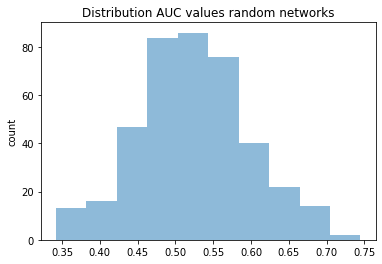

p = 0.563938
The null hypothesis cannot be rejected. Sí normal.
2.0066642395526015e-172
4.644642599499796e-105
5.304635346833698e-180
1.4971201186478633e-40
2.4080392568893333e-24
2.6489736473185257e-47
1.2446980590217087e-45
8.257781080171803e-145


In [64]:
infile = '/home/laura/Desktop/random_runs/PET_ND_PPI_SHUFFLED_runs.csv'

data = pd.read_csv(infile, index_col='random')


pval1, pval2, pval3, pval11, pval22, pval33, pval_ms, pval_mn = compute_pvalues(nd_ppi_pet, mean_nd_ppi_pet, data)

print(pval1)
print(pval2)
print(pval3)
print(pval11)
print(pval22)
print(pval33)
print(pval_ms)
print(pval_mn)

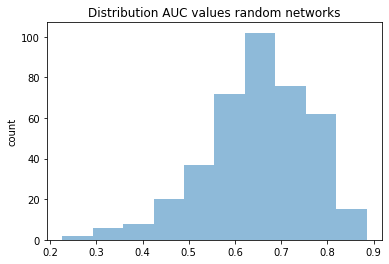

p = 9.1164e-07
The null hypothesis can be rejected. No normal.
1.1070432828099415e-09
3.450447528405384e-39
6.511278835635151e-28
0.0012267961352722889
1.2681499720242333e-10
1.6502549704230976e-06
0.0009738699857364426
3.1153685154476464e-06


In [65]:
infile = '/home/laura/Desktop/random_runs/PETandDX_AD_PPI_SHUFFLED_runs.csv'

data = pd.read_csv(infile, index_col='random')

pval1, pval2, pval3, pval11, pval22, pval33, pval_ms, pval_mn = compute_pvalues(ad_ppi_petdx, mean_ad_ppi_petdx, data)

print(pval1)
print(pval2)
print(pval3)
print(pval11)
print(pval22)
print(pval33)
print(pval_ms)
print(pval_mn)

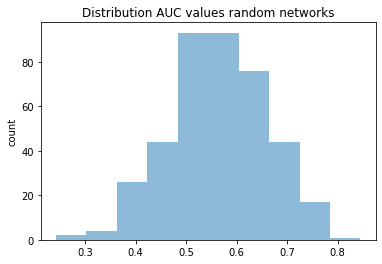

p = 0.472146
The null hypothesis cannot be rejected. Sí normal.
9.162148318454445e-167
1.014149352993148e-201
3.159232328825618e-43
4.2574040020656514e-45
7.273656465547257e-49
1.5728002979286284e-06
1.21032846870263e-28
2.147710757638723e-74


In [66]:
infile = '/home/laura/Desktop/random_runs/PETandDX_ND_PPI_SHUFFLED_runs.csv'

data = pd.read_csv(infile, index_col='random')

pval1, pval2, pval3, pval11, pval22, pval33, pval_ms, pval_mn = compute_pvalues(nd_ppi_petdx, mean_nd_ppi_petdx, data)

print(pval1)
print(pval2)
print(pval3)
print(pval11)
print(pval22)
print(pval33)
print(pval_ms)
print(pval_mn)

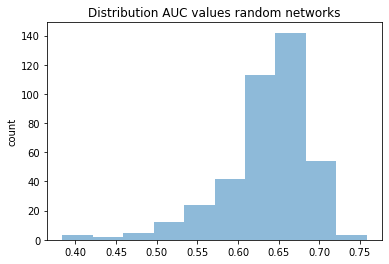

p = 3.73493e-26
The null hypothesis can be rejected. No normal.
5.012675109931727e-63
2.90541603270458e-107
1.1089701749160533e-123
3.911237592349532e-18
7.382302703376121e-26
7.240052605551493e-34
1.466334355237101e-37
7.588191998235935e-99


In [67]:
infile = '/home/laura/Desktop/random_runs/PET_AD_PPI_REWIRED_runs.csv'

data = pd.read_csv(infile, index_col='random')

pval1, pval2, pval3, pval11, pval22, pval33, pval_ms, pval_mn = compute_pvalues(ad_ppi_pet, mean_ad_ppi_pet, data)

print(pval1)
print(pval2)
print(pval3)
print(pval11)
print(pval22)
print(pval33)

print(pval_ms)
print(pval_mn)

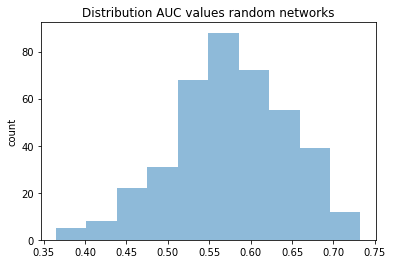

p = 0.0465924
The null hypothesis cannot be rejected. Sí normal.
3.9766705572547284e-131
2.7761962226300847e-49
1.4492536079728665e-140
7.061478531318817e-32
3.28601000732073e-13
7.672892524736404e-35
2.002476993011911e-33
1.063741862869336e-96


In [68]:
infile = '/home/laura/Desktop/random_runs/PET_ND_PPI_REWIRED_runs.csv'

data = pd.read_csv(infile, index_col='random')

pval1, pval2, pval3, pval11, pval22, pval33, pval_ms, pval_mn = compute_pvalues(nd_ppi_pet, mean_nd_ppi_pet, data)

print(pval1)
print(pval2)
print(pval3)
print(pval11)
print(pval22)
print(pval33)

print(pval_ms)
print(pval_mn)

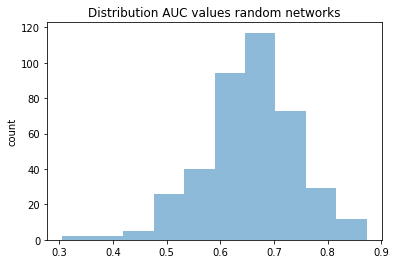

p = 4.91716e-05
The null hypothesis can be rejected. No normal.
8.895620173481434e-09
7.399983183972746e-49
2.1261558577868845e-33
0.004689496786944755
7.297798021924094e-18
0.0002360224491175857
0.00488593413834729
0.0001126916251447925


In [69]:
infile = '/home/laura/Desktop/random_runs/PETandDX_AD_PPI_REWIRED_runs.csv'

data = pd.read_csv(infile, index_col='random')

pval1, pval2, pval3, pval11, pval22, pval33, pval_ms, pval_mn = compute_pvalues(ad_ppi_petdx, mean_ad_ppi_petdx, data)

print(pval1)
print(pval2)
print(pval3)
print(pval11)
print(pval22)
print(pval33)
print(pval_ms)
print(pval_mn)

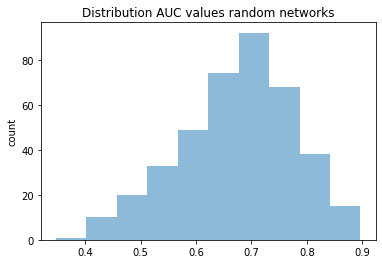

p = 0.0116517
The null hypothesis cannot be rejected. Sí normal.
2.6008101036153642e-76
4.157936684795457e-123
0.9999999999883081
1.397965011082168e-18
8.585286182718732e-30
0.9999560197909642
0.5235571326848358
0.5386011210973847


In [70]:
infile = '/home/laura/Desktop/random_runs/PETandDX_ND_PPI_REWIRED_runs.csv'

data = pd.read_csv(infile, index_col='random')

pval1, pval2, pval3, pval11, pval22, pval33, pval_ms, pval_mn = compute_pvalues(nd_ppi_petdx, mean_nd_ppi_petdx, data)

print(pval1)
print(pval2)
print(pval3)
print(pval11)
print(pval22)
print(pval33)
print(pval_ms)
print(pval_mn)